In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\archive (8)\train.csv")
df.head(3)


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1


In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1


In [7]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# Data Cleaning
cat_cols = df.select_dtypes(include="object").columns


In [10]:
cat_cols

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation'],
      dtype='object')

In [11]:
df["gender"].unique()

array(['f', 'm'], dtype=object)

In [12]:
df['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [13]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [14]:
df['jaundice'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['austim'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df['age_desc'].unique()

array(['18 and more'], dtype=object)

In [17]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [18]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [19]:
for col in cat_cols:
    print(col,end=" : ")
    print(df[col].unique())

gender : ['f' 'm']
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice : ['no' 'yes']
austim : ['no' 'yes']
contry_of_res : ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
used_app_before : ['no' 'yes']
age_desc : ['18 and more']
relation : ['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']


In [20]:
# Replaced all dataset at once 

In [21]:
df = df.replace({'yes':1,'no':0,'?':'Others','others':'Others','f':0,'m':1})

C:\Users\dell\AppData\Local\Temp\ipykernel_7088\3399742056.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes':1,'no':0,'?':'Others','others':'Others','f':0,'m':1})


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    int64  
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    int64  
 15  austim           800 non-null    int64  
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [23]:
# EDA Exploratory Data Analysis

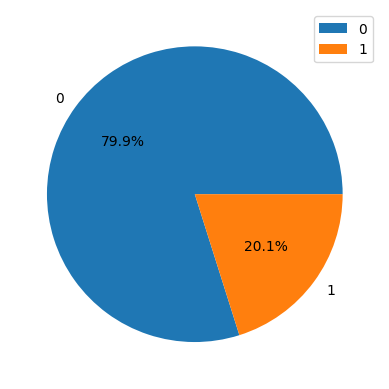

In [24]:
plt.pie(df['Class/ASD'].value_counts().values,autopct = '%1.1f%%',labels = df['Class/ASD'].unique())
plt.legend(df['Class/ASD'].unique())
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    int64  
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    int64  
 15  austim           800 non-null    int64  
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [26]:
# Find all int , float and object column names
ints = []
floats = []
objects = []
for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == float:
        floats.append(col)
    else:
        objects.append(col)

In [27]:
ints,floats,objects

(['ID',
  'A1_Score',
  'A2_Score',
  'A3_Score',
  'A4_Score',
  'A5_Score',
  'A6_Score',
  'A7_Score',
  'A8_Score',
  'A9_Score',
  'A10_Score',
  'gender',
  'jaundice',
  'austim',
  'used_app_before',
  'Class/ASD'],
 ['age', 'result'],
 ['ethnicity', 'contry_of_res', 'age_desc', 'relation'])

In [28]:
ints.remove('ID')
ints.remove('Class/ASD')

In [29]:
# Converts  the data to long form using melt

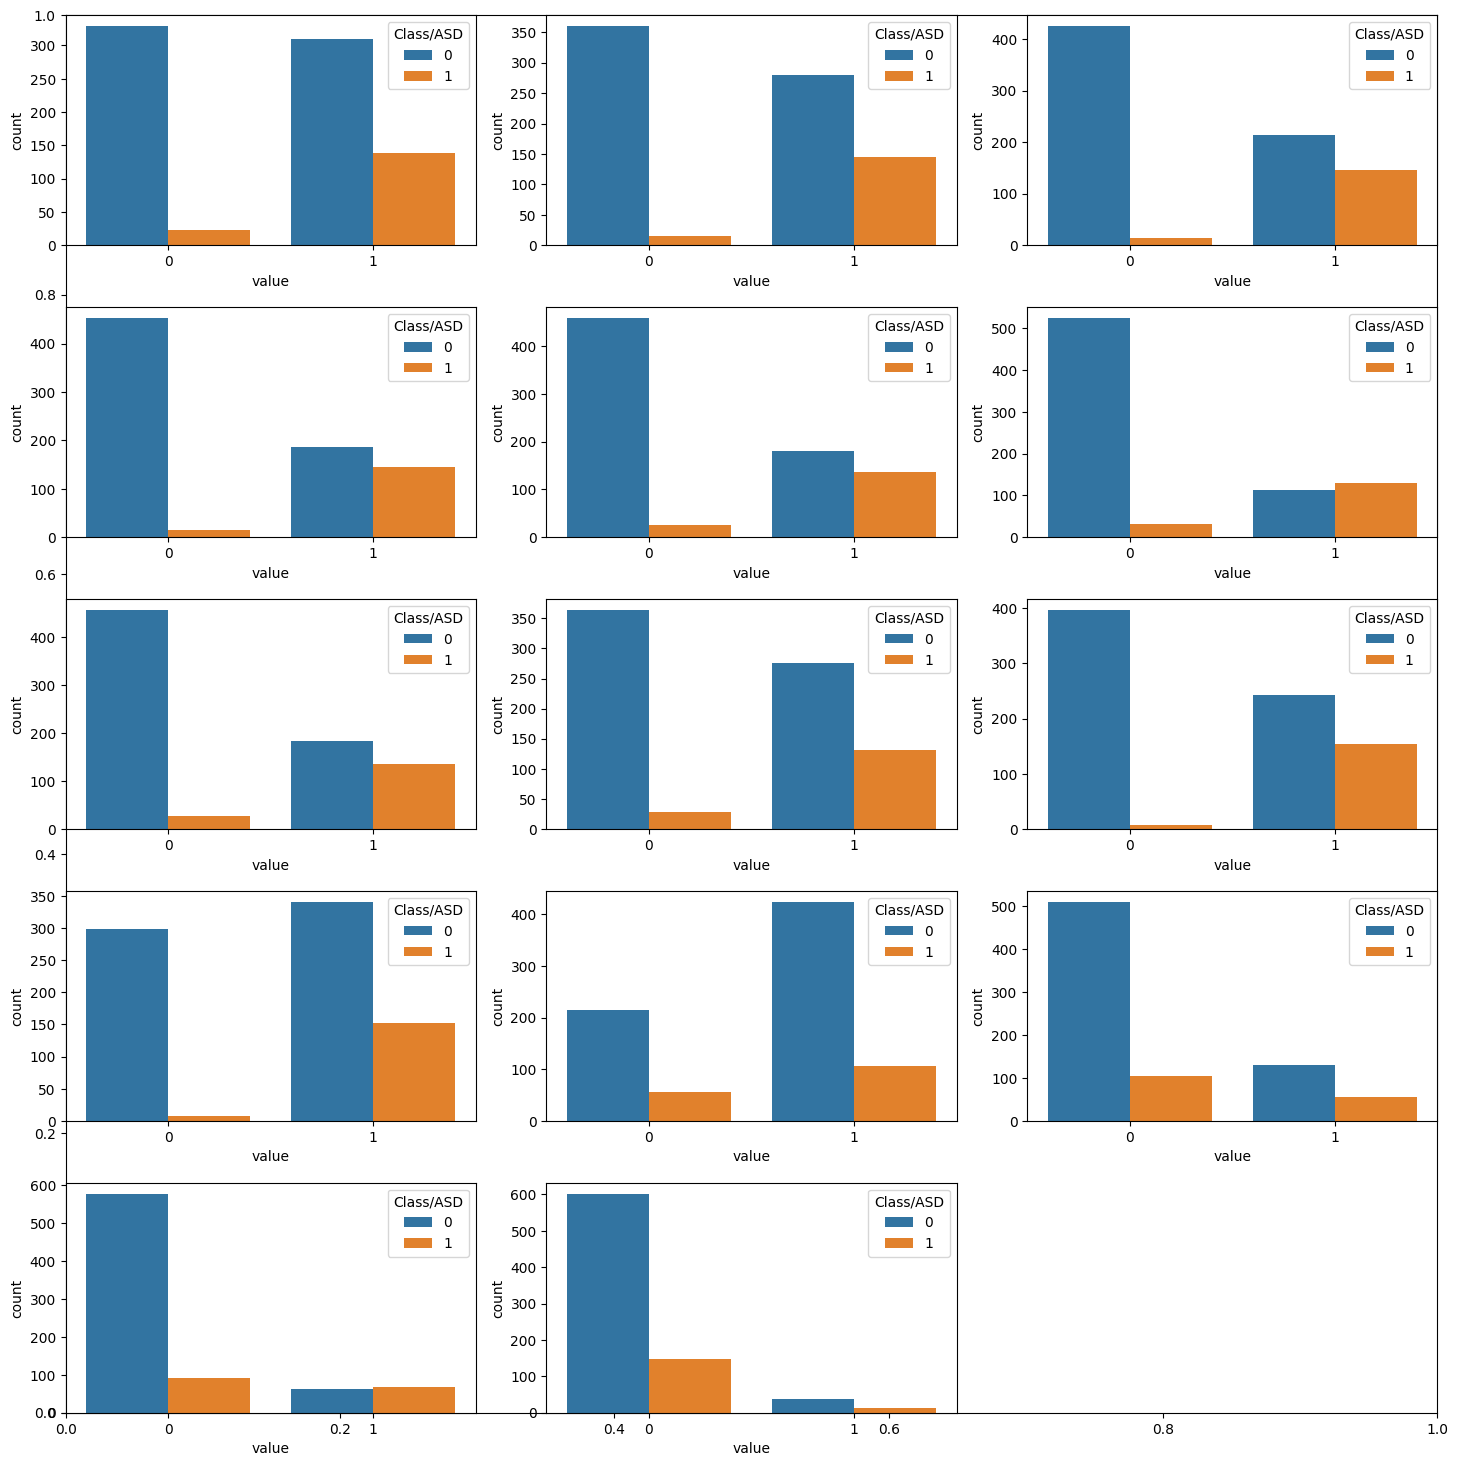

In [30]:
df_melted = df.melt(id_vars = ['ID','Class/ASD'],value_vars = ints,var_name = 'col',value_name= 'value')
plt.subplots(figsize= (15,15))
for i ,col in enumerate(ints):
    plt.subplot(5,3,i+1)
    sns.countplot(x = 'value',hue='Class/ASD', data = df_melted[df_melted['col']==col])
plt.tight_layout()
plt.show()

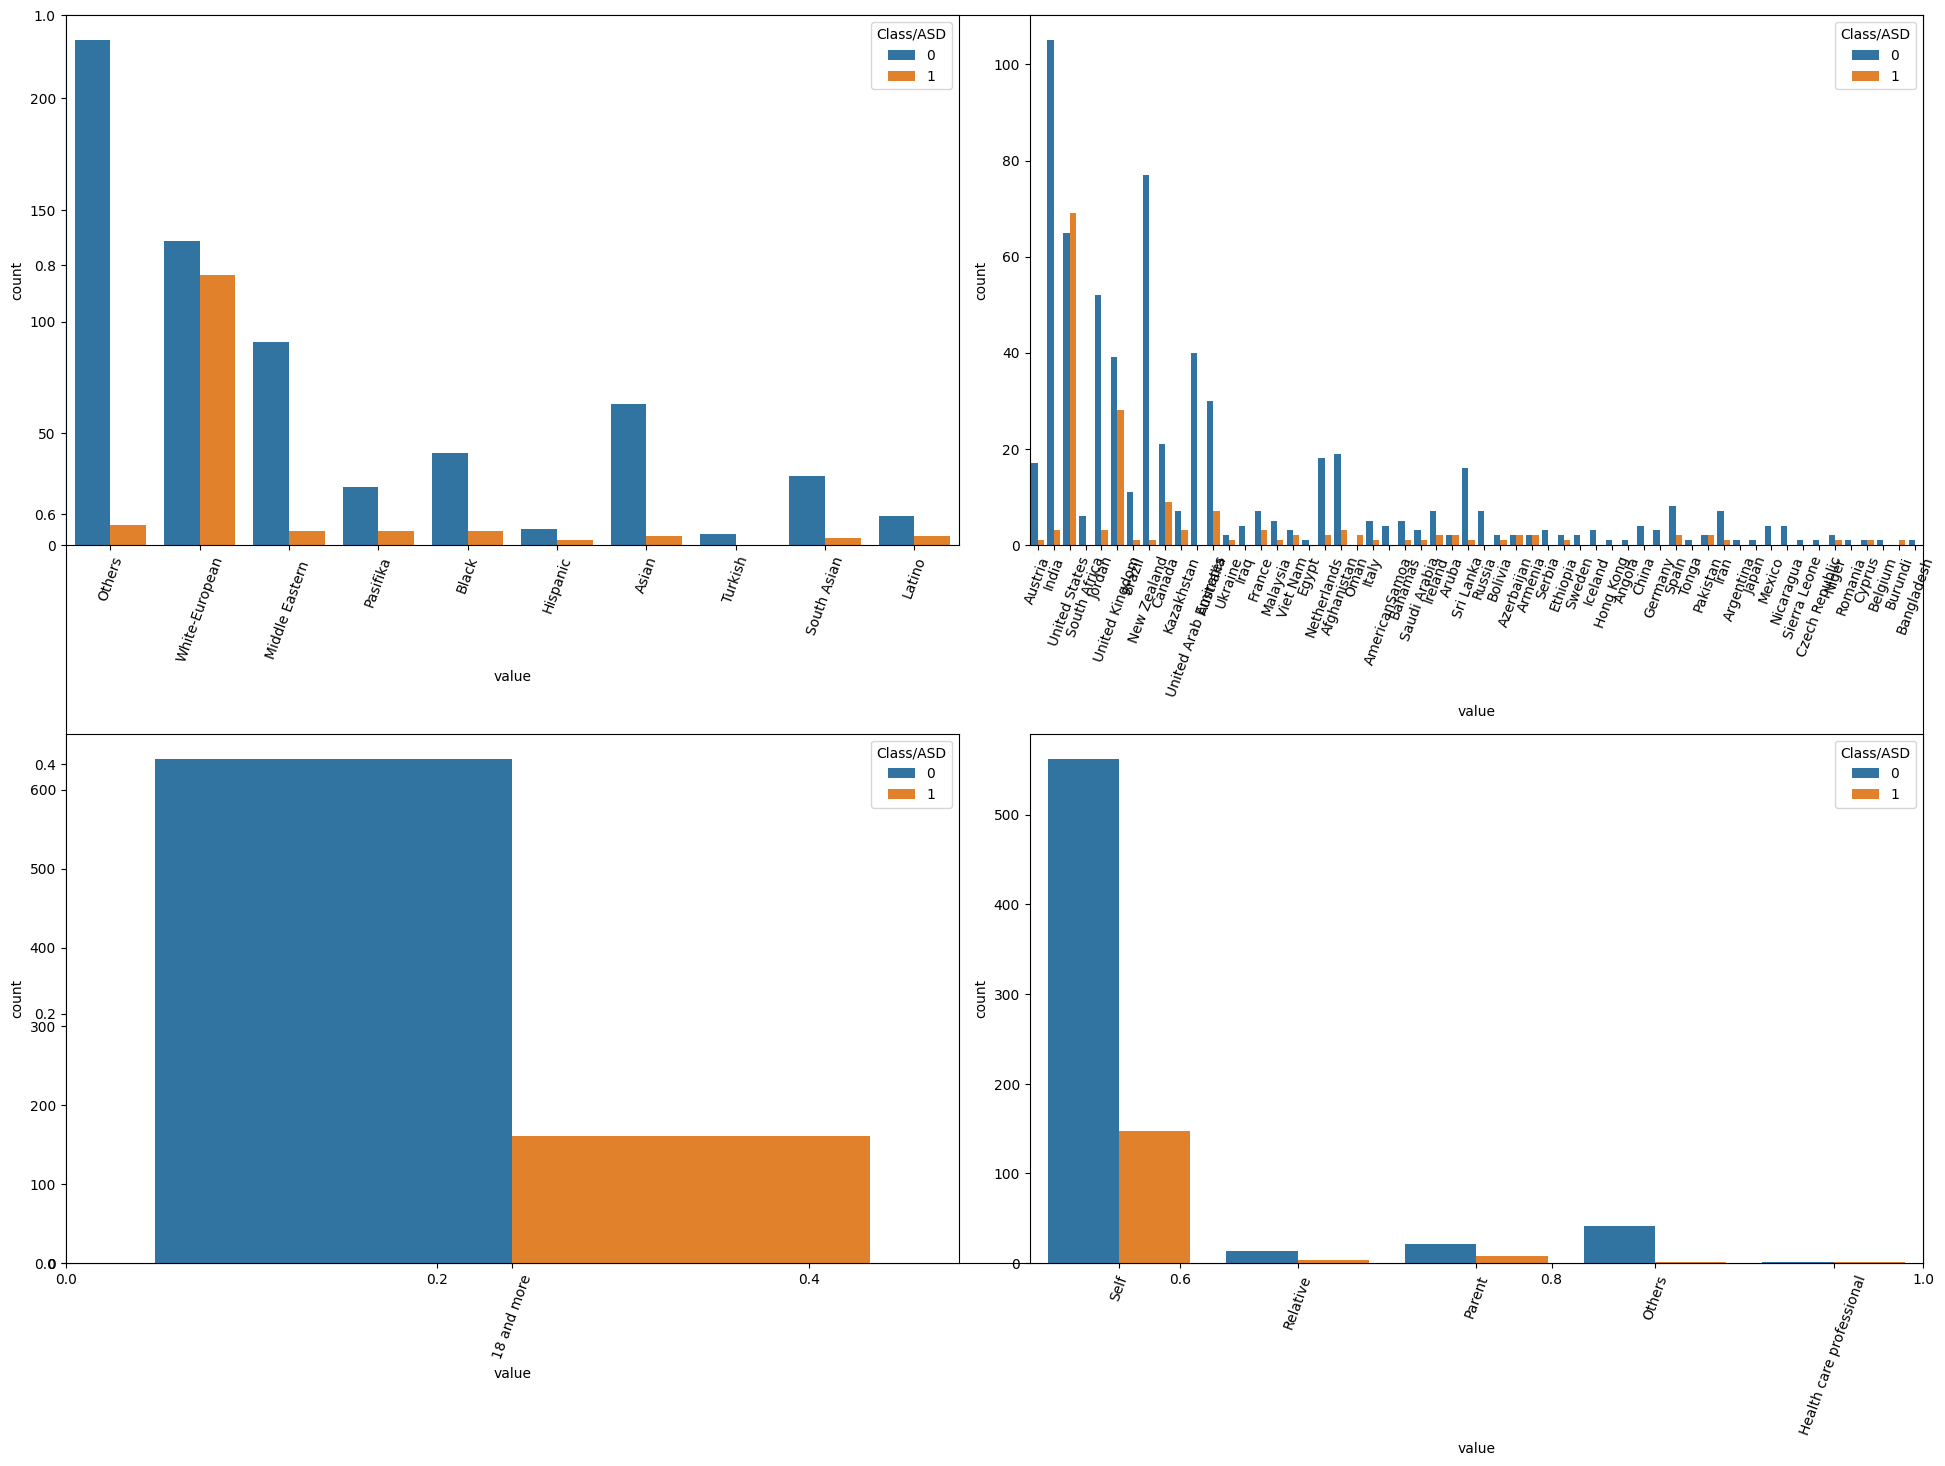

In [31]:
plt.subplots(figsize=(20,15))
for i, col in enumerate(objects):
    plt.subplot(2,2,i+1)
    df_melted = df.melt(id_vars=['Class/ASD'],value_vars=[col],var_name='col',value_name='value')
    sns.countplot(x = 'value',hue='Class/ASD', data = df_melted)
    plt.xticks(rotation = 70) 
plt.tight_layout()
plt.show()
    


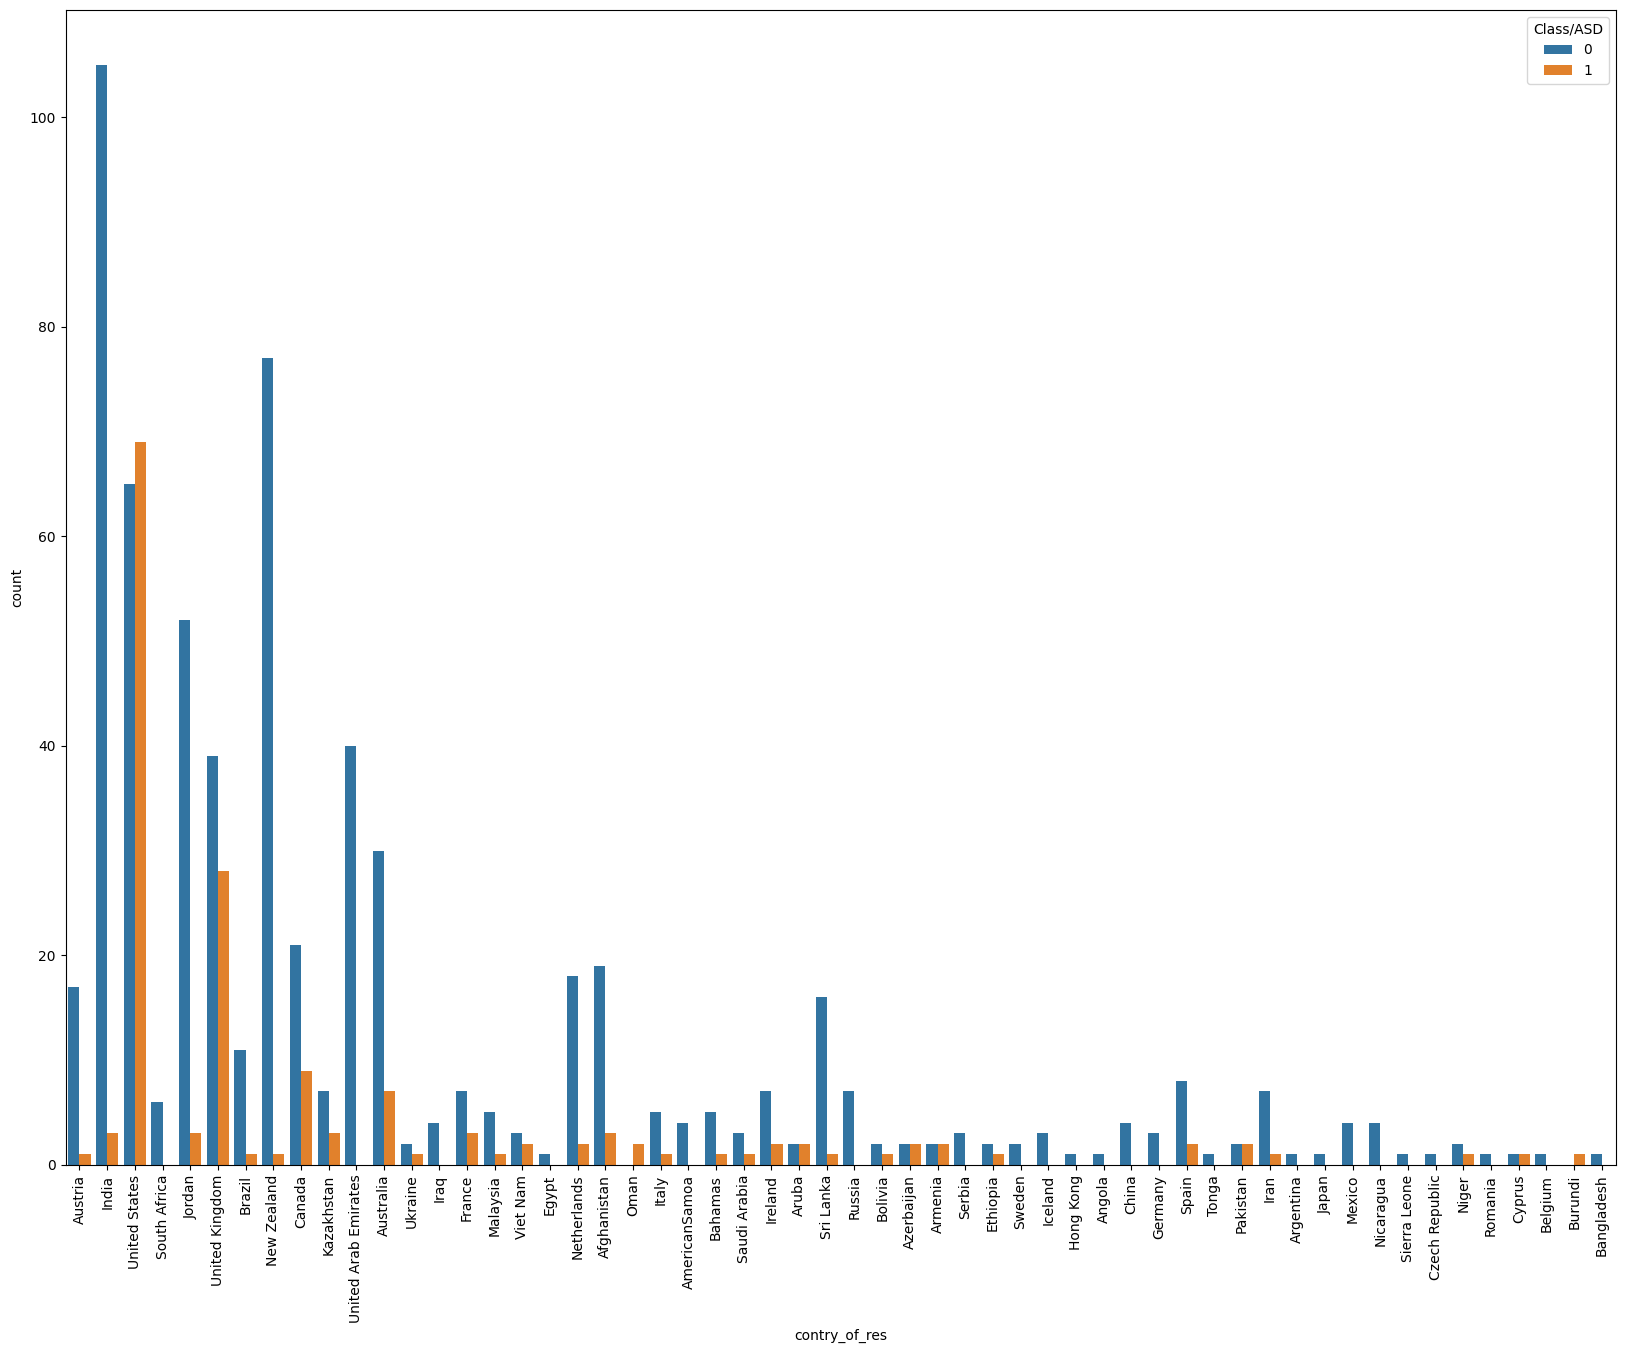

In [32]:
plt.subplots(figsize=(20,15))
sns.countplot(data = df ,x = 'contry_of_res',hue= 'Class/ASD')
plt.xticks(rotation = 90) 
plt.show()
   

C:\Users\dell\AppData\Local\Temp\ipykernel_7088\2395946890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_7088\2395946890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


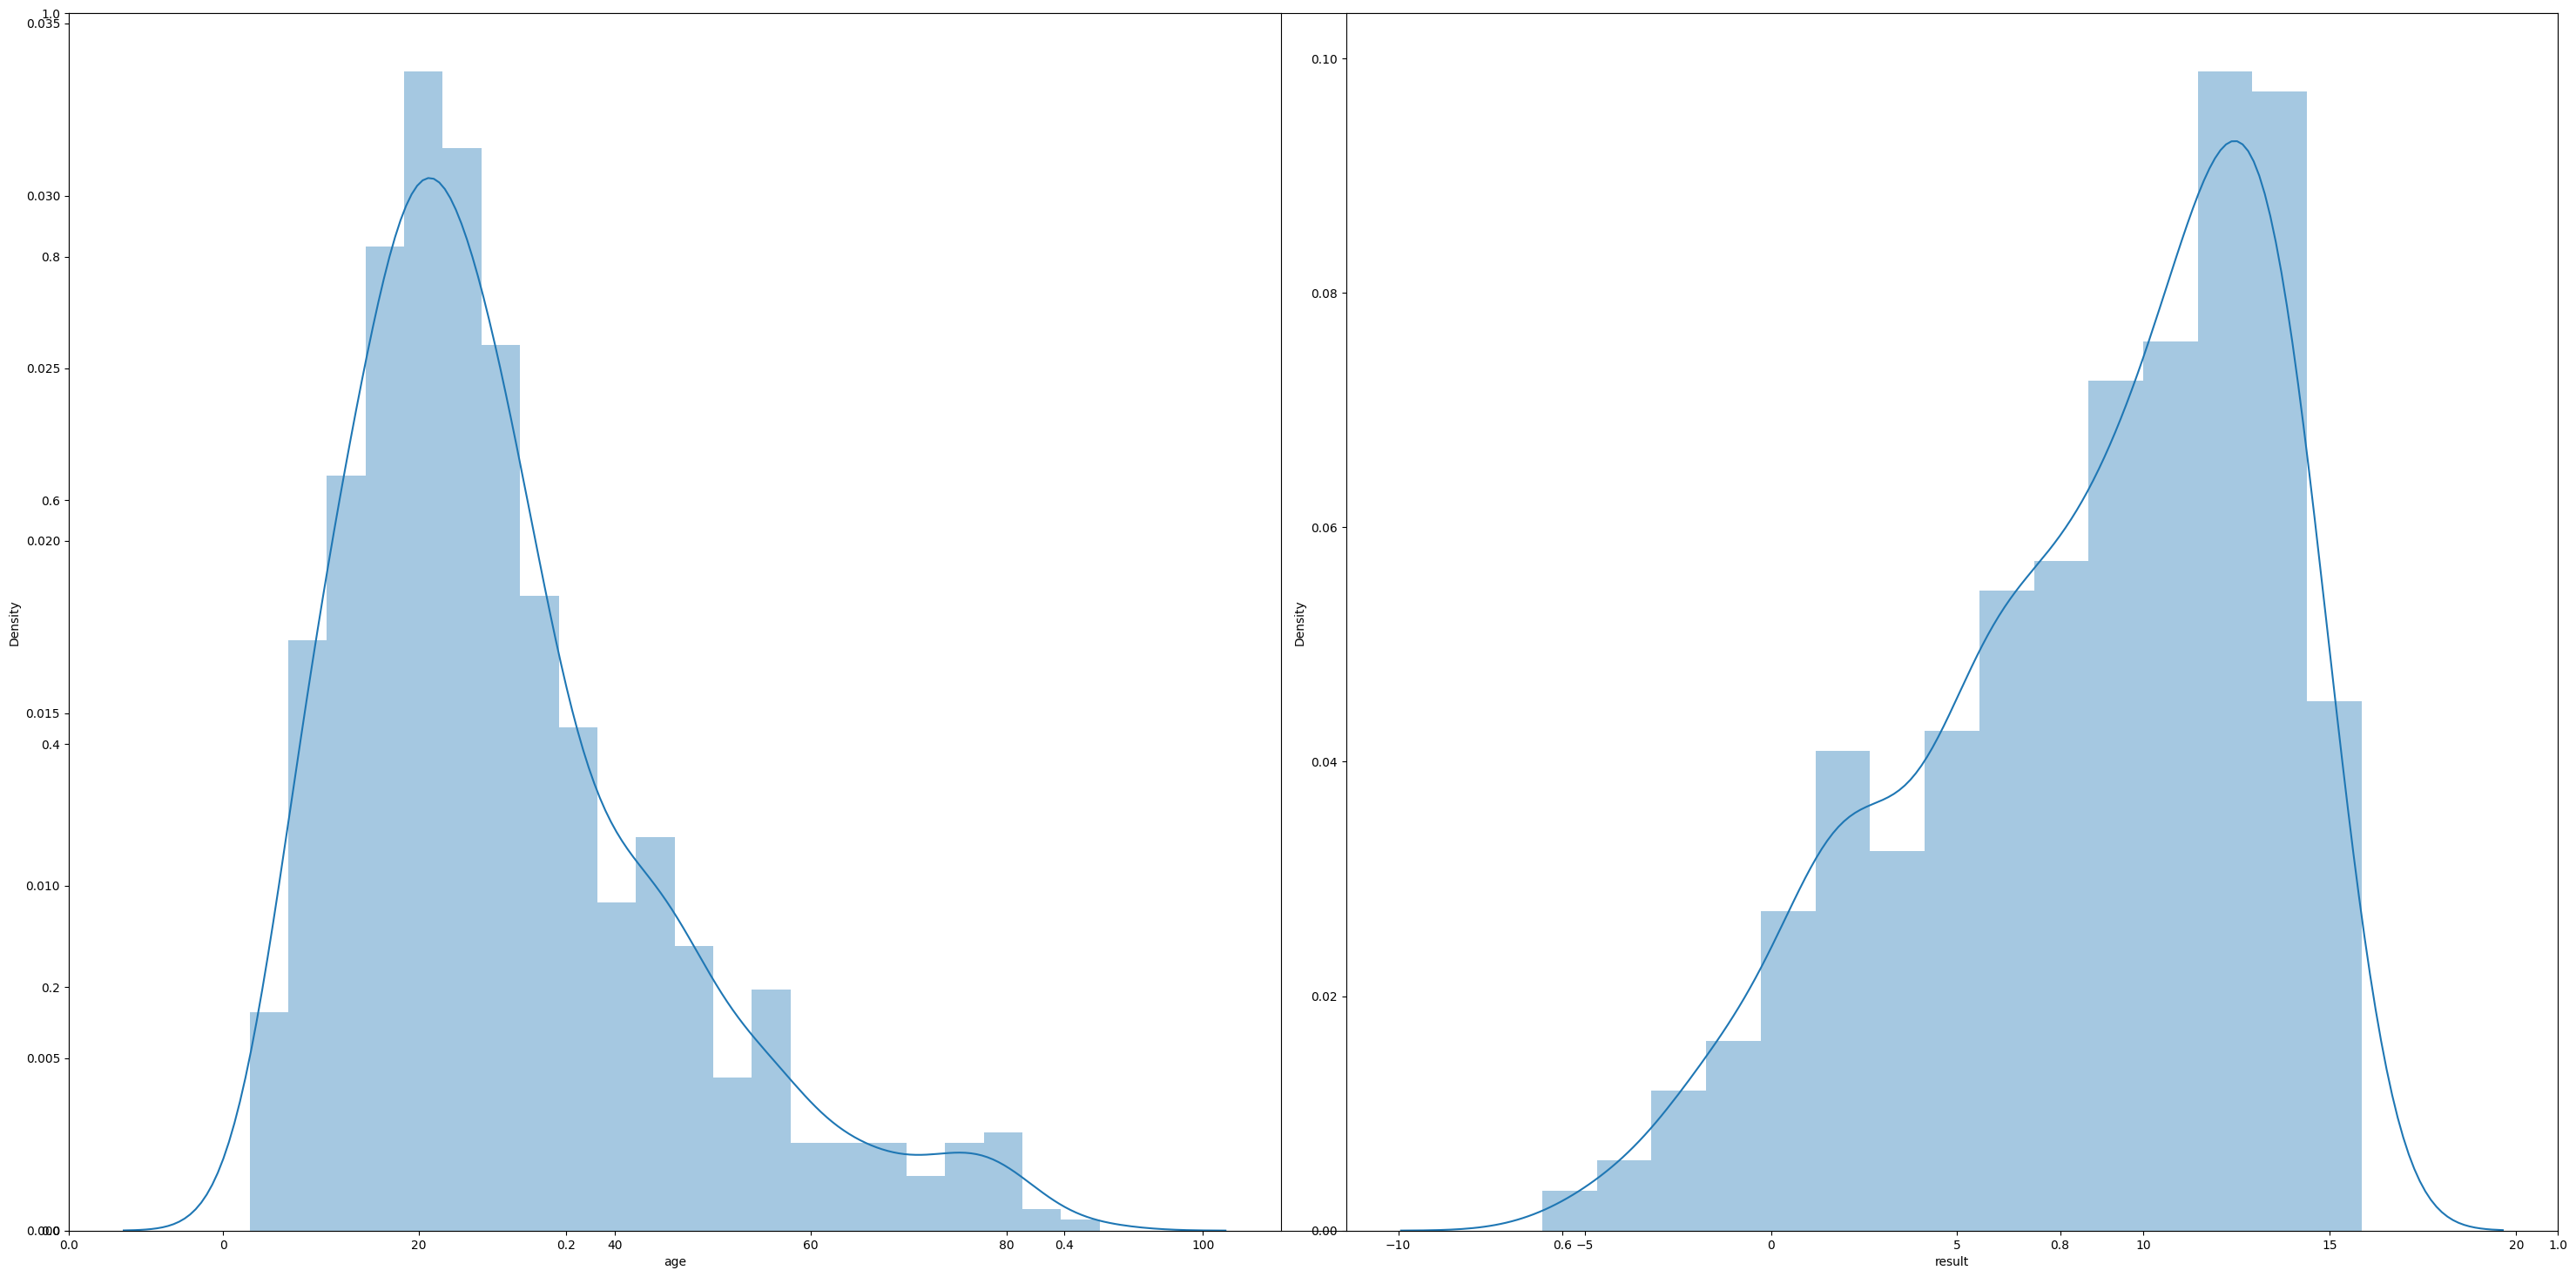

In [33]:
# Outlier 
plt.subplots(figsize=(30,15))
for i ,col in enumerate (floats):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
plt.tight_layout() 
plt.show()
    

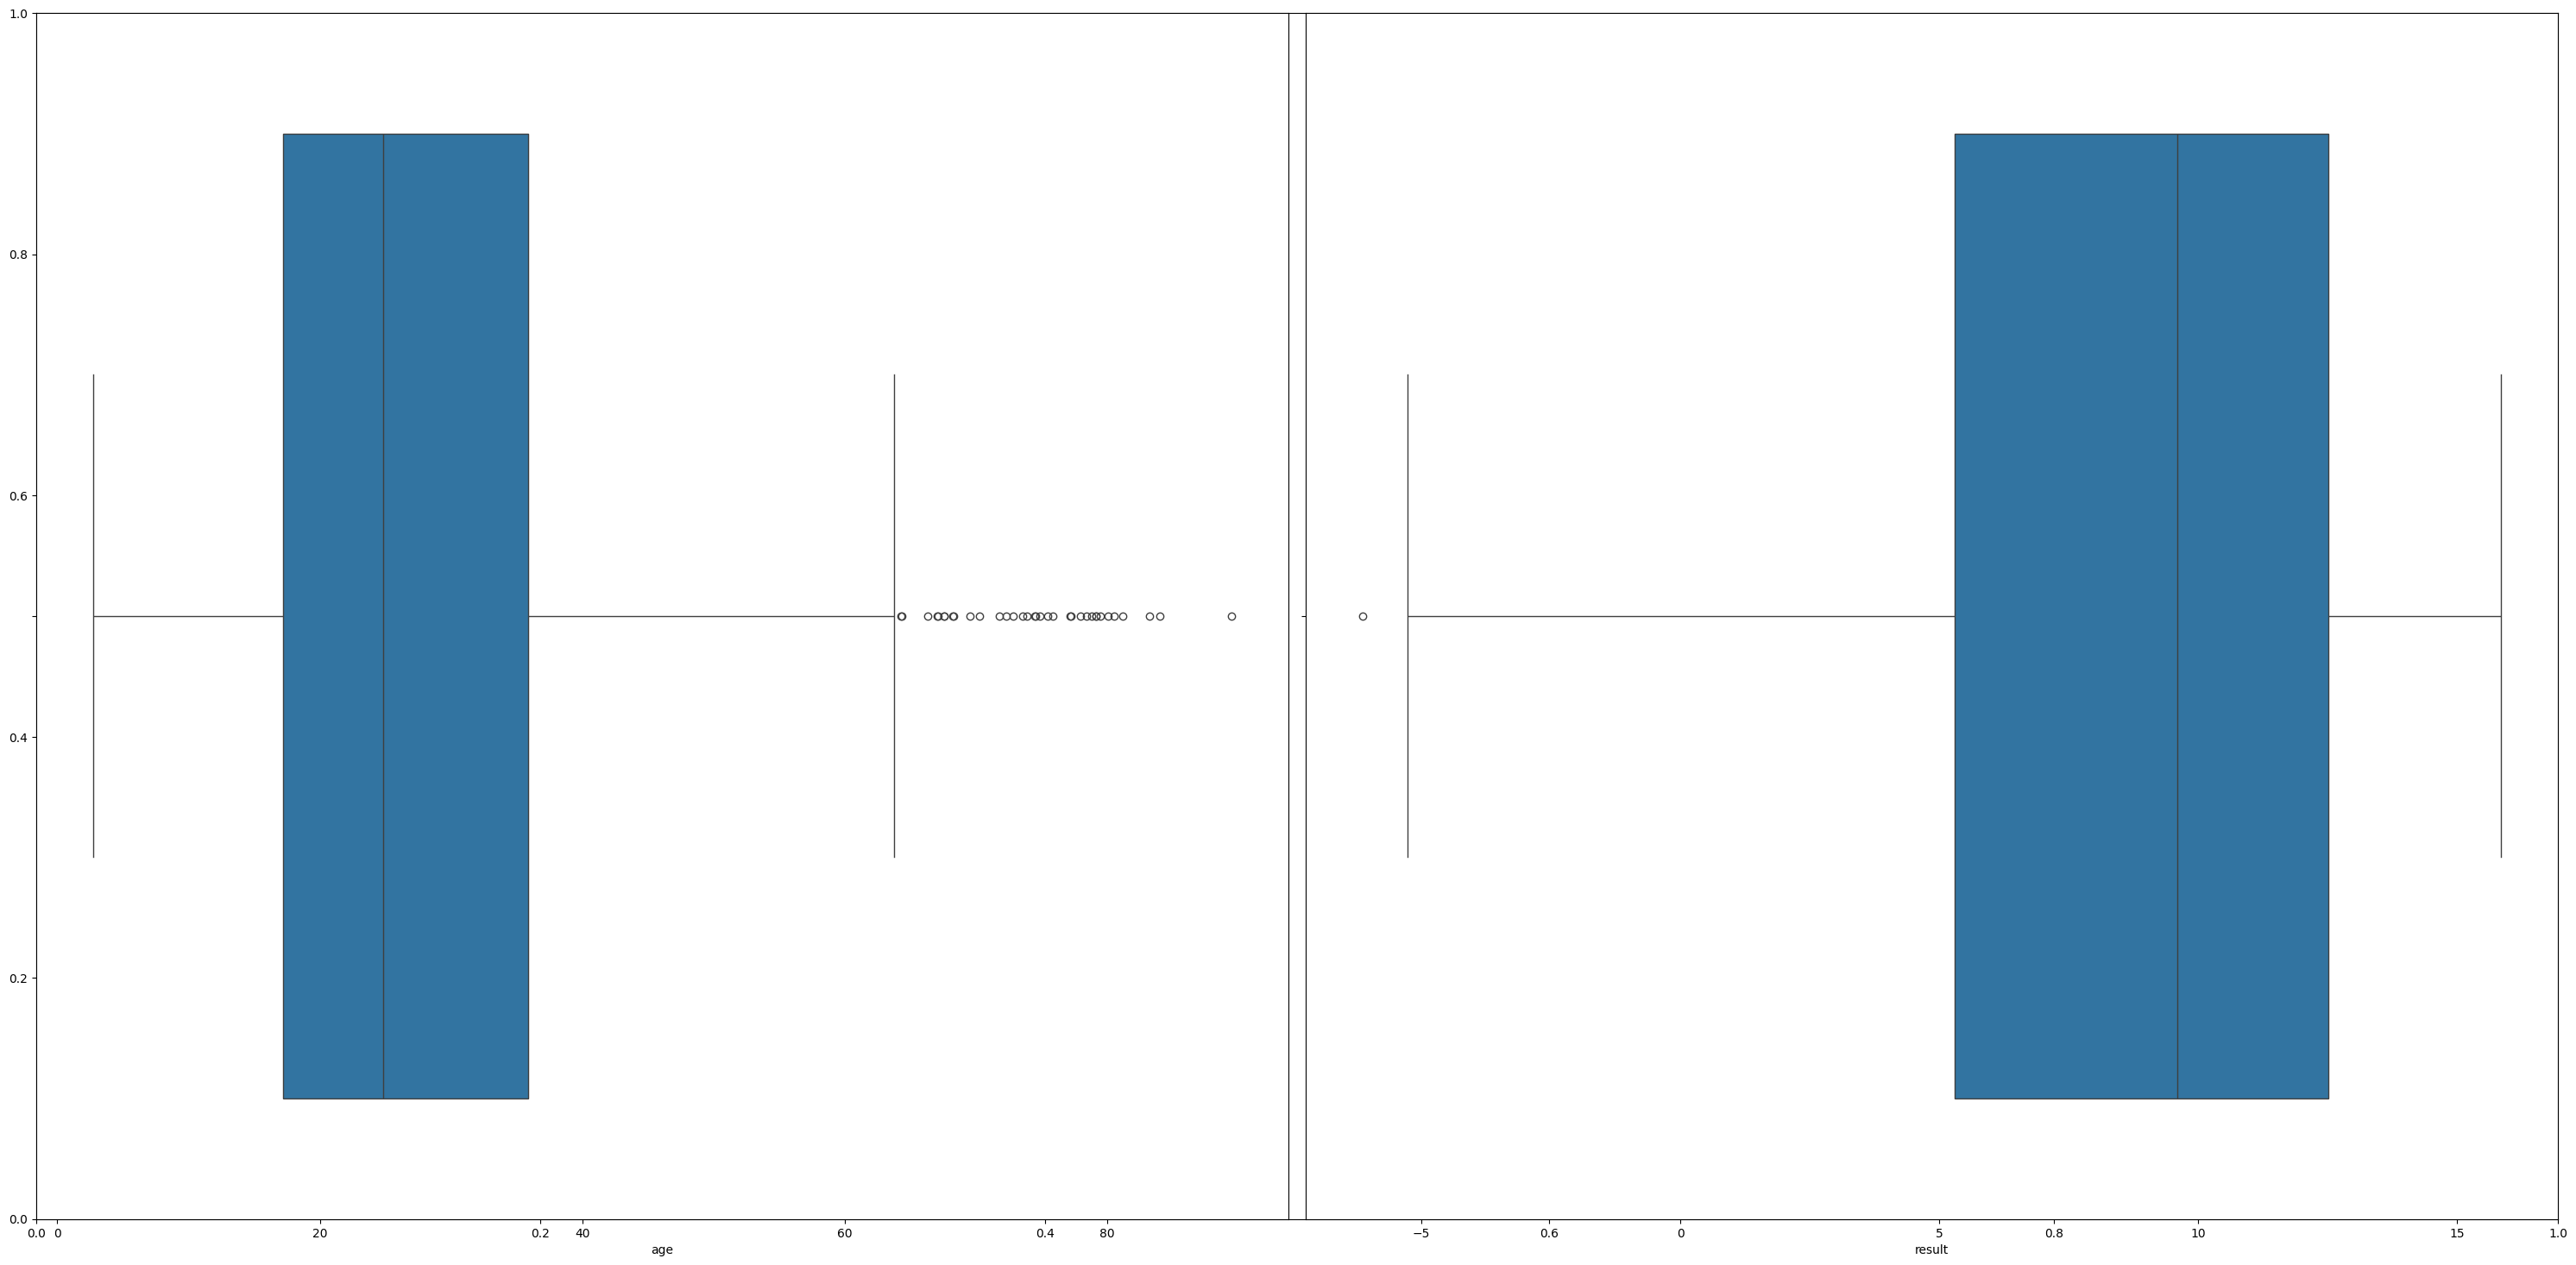

In [34]:
plt.subplots(figsize=(30,15))
for i ,col in enumerate (floats):
    plt.subplot(1,2,i+1)
    sns.boxplot(x = df[col])
plt.tight_layout() 
plt.show()
 

In [35]:
df = df[df['result']>=-5]

In [36]:
df.shape

(798, 22)

In [37]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,0,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,1,Others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,1,White-European,0,1,United States,0,14.851484,18 and more,Self,1


In [38]:
# Feature Engineering

In [39]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [40]:
df['age'].unique()

array([38.17274623, 47.7505168 ,  7.38037308, 23.56192742, 43.20579044,
       31.5279644 , 28.42797076, 26.48449442, 48.20345856, 24.16794517,
       21.49703144,  9.04422584, 56.00816807, 21.0875973 , 29.14538397,
       31.27199413, 23.73476684, 28.63694334, 14.4049851 , 72.83887066,
       25.06830214, 15.36750123, 41.95517061, 21.05567436, 14.12910836,
       54.49860242, 26.59264047, 26.42977485, 12.84159731,  9.66220855,
       30.50058819, 74.87051104, 26.07964814, 67.00819233, 22.46984114,
       30.94822637, 24.92914563, 24.94160486, 11.88213606, 26.75778566,
       44.32227347, 74.53450864, 23.58363906, 25.64110026, 22.57022313,
       35.73551276, 22.41443272, 30.19192183, 47.59591916,  7.57244956,
       17.34629766, 41.22877555, 18.70249321,  6.9287435 , 41.8240423 ,
       46.08667963, 23.63397697, 48.35947059, 42.6822189 , 21.53439758,
       21.47758213, 35.23448231, 51.91718291, 14.05691123, 13.56674871,
       38.91852862, 16.33264533, 17.52426083, 37.9815074 , 19.60

In [41]:
df['age']

0      38.172746
1      47.750517
2       7.380373
3      23.561927
4      43.205790
         ...    
795    16.597187
796    20.703001
797     5.711481
798    16.414305
799    46.966113
Name: age, Length: 798, dtype: float64

In [42]:
def ageGroup(age):
    if age<4:
        return "Toddler"
    elif age<12:
        return "Kid"
    elif age<18:
        return "Teenager"
    elif age<40:
        return "Young"
    else:
        return "Senior"

In [43]:
df['ageGroup'] = df['age'].map(ageGroup)

In [44]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup
0,1,1,0,1,0,1,0,1,0,1,...,Others,0,0,Austria,0,6.351166,18 and more,Self,0,Young
1,2,0,0,0,0,0,0,0,0,0,...,Others,0,0,India,0,2.255185,18 and more,Self,0,Senior
2,3,1,1,1,1,1,1,1,1,1,...,White-European,0,1,United States,0,14.851484,18 and more,Self,1,Kid


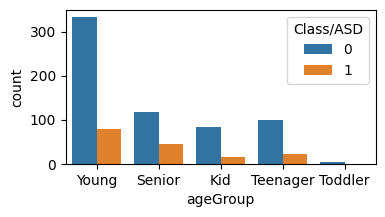

In [45]:
plt.figure(figsize=(4,2))
sns.countplot(x = df['ageGroup'],hue = df['Class/ASD'])
plt.show()

In [46]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD',
       'ageGroup'],
      dtype='object')

In [47]:
def add_feature(data):
    data['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
        data['sum_score'] = data['sum_score']+ data[col]
    return data
        

In [48]:
df = add_feature(df)

In [49]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score
0,1,1,0,1,0,1,0,1,0,1,...,0,0,Austria,0,6.351166,18 and more,Self,0,Young,6
1,2,0,0,0,0,0,0,0,0,0,...,0,0,India,0,2.255185,18 and more,Self,0,Senior,0
2,3,1,1,1,1,1,1,1,1,1,...,0,1,United States,0,14.851484,18 and more,Self,1,Kid,10


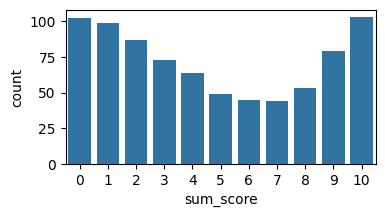

In [50]:
plt.figure(figsize=(4,2))
sns.countplot(x = df['sum_score'])
plt.show()

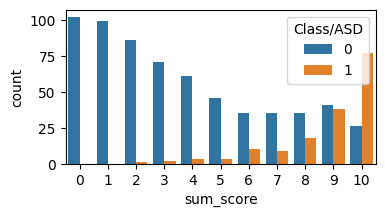

In [51]:
plt.figure(figsize=(4,2))
sns.countplot(x = df['sum_score'],hue = df['Class/ASD'])
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_7088\537838370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


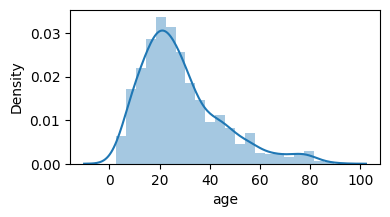

In [52]:
plt.figure(figsize=(4,2))
sns.distplot(df['age'])
plt.show()

In [53]:
np.log(1)

np.float64(0.0)

In [54]:
df['age'] = df['age'].map(lambda x:np.log(x))

In [55]:
df['age']

0      3.642122
1      3.865990
2      1.998824
3      3.159632
4      3.765975
         ...   
795    2.809233
796    3.030279
797    1.742478
798    2.798153
799    3.849426
Name: age, Length: 798, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_7088\1316458747.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['age'])


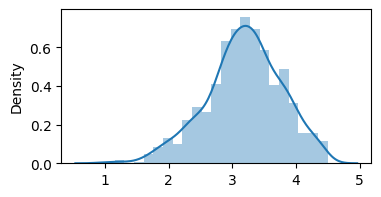

In [56]:
plt.figure(figsize=(4,2))
sns.distplot(x = df['age'])
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    int64  
 13  ethnicity        798 non-null    object 
 14  jaundice         798 non-null    int64  
 15  austim           798 non-null    int64  
 16  contry_of_res    798 non-null    object 
 17  used_app_before  798 

In [58]:
# Encoding Objects
def encode_labels(data):
    for col in data.columns:
        if(data[col].dtype == 'object'):
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

In [59]:
df = encode_labels(df)

In [60]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score
0,1,1,0,1,0,1,0,1,0,1,...,0,0,7,0,6.351166,0,4,0,4,6
1,2,0,0,0,0,0,0,0,0,0,...,0,0,25,0,2.255185,0,4,0,1,0
2,3,1,1,1,1,1,1,1,1,1,...,0,1,54,0,14.851484,0,4,1,0,10


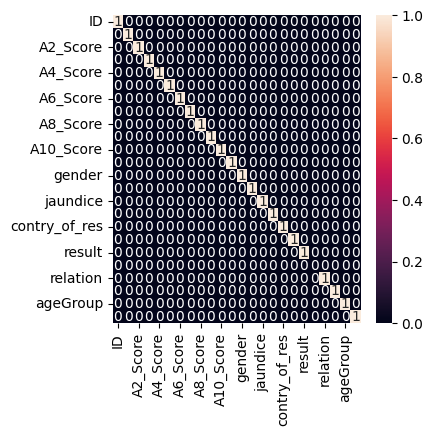

In [61]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr()>0.8, annot = True ,cbar= True)
plt.show()

In [68]:
X = df.drop(columns=['ID','austim','used_app_before','age_desc','Class/ASD'])

In [69]:
X.shape

(798, 19)

In [70]:
y = df['Class/ASD']

In [71]:
y.shape

(798,)

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [73]:
X_train.shape

(638, 19)

In [74]:
scaler = StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train)

In [76]:
X_train

array([[-1.1235708 ,  0.95104028,  1.10239638, ...,  0.34444338,
        -1.62358139, -0.47346553],
       [ 0.89001957,  0.95104028,  1.10239638, ...,  0.34444338,
         0.9419788 ,  1.24122326],
       [ 0.89001957,  0.95104028,  1.10239638, ...,  0.34444338,
        -0.34080129,  1.24122326],
       ...,
       [-1.1235708 , -1.05148018, -0.90711474, ...,  0.34444338,
         0.9419788 , -1.04502846],
       [-1.1235708 , -1.05148018, -0.90711474, ...,  0.34444338,
         0.9419788 , -1.04502846],
       [-1.1235708 , -1.05148018, -0.90711474, ...,  0.34444338,
         0.9419788 , -1.33080993]])

In [77]:
X_test = scaler.fit_transform(X_test)

In [78]:
X_test

array([[-1.16316   , -1.11960758, -0.90453403, ...,  0.30287978,
         0.78532688, -1.38190465],
       [ 0.85972695, -1.11960758, -0.90453403, ..., -2.63413631,
         0.78532688, -0.51482722],
       [ 0.85972695,  0.89317009,  1.1055416 , ...,  0.30287978,
        -1.14778543,  1.50835345],
       ...,
       [-1.16316   ,  0.89317009, -0.90453403, ...,  0.30287978,
        -0.50341466, -0.51482722],
       [ 0.85972695,  0.89317009,  1.1055416 , ...,  0.30287978,
        -0.50341466,  1.50835345],
       [ 0.85972695,  0.89317009, -0.90453403, ...,  0.30287978,
        -1.7921562 ,  0.93030183]])

In [79]:
models = [SVC(),LogisticRegression()]

In [80]:
for model in models:
    model.fit(X_train,y_train)
    print(model,':Training Accuracy:' ,metrics.roc_auc_score(y_train,model.predict(X_train)))
    print(model,':Validation Accuracy:',metrics.roc_auc_score(y_test,model.predict(X_test)))

SVC() :Training Accuracy: 0.8477348927875242
SVC() :Validation Accuracy: 0.7652329749103943
LogisticRegression() :Training Accuracy: 0.8080389863547758
LogisticRegression() :Validation Accuracy: 0.7849462365591396


 LogisticRegression is better working besides SVC

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 100x100 with 0 Axes>

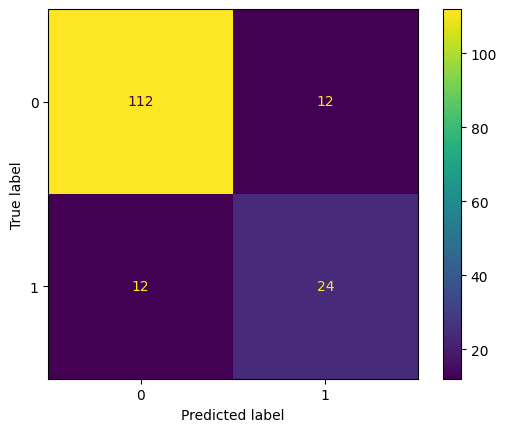

In [86]:
plt.figure(figsize=(1,1))
ConfusionMatrixDisplay.from_estimator(models[1],X_test,y_test)
plt.show()

Conclusion:- Our Machine Learning Model is around 80% accurate. This model can predict weather a person has disorder Autism or not.
This is the power of Machine Learning Alogrithm by using many of the real world problems are being solved.